In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from modules import contour_modules,image_processing_modules,robust_template_match

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


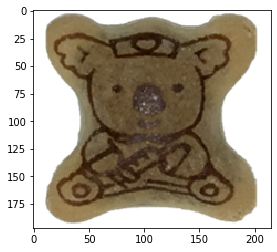

In [4]:
template = cv2.imread('template.png')[:,:,::-1]

plt.imshow(template)


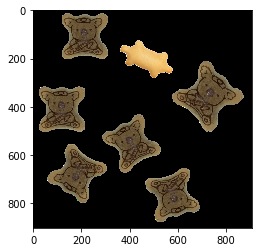

In [5]:
test_img = cv2.imread('test.png')[:,:,::-1]
plt.imshow(test_img)

In [9]:
st=time.time()
minrect_boxes_contours,box_loc_angle,box_locations=robust_template_match.TemplateMatch(test_img,template)
print(time.time()-st)

0.01700282096862793


In [12]:
# this is reference
st=time.time()
cv2.matchTemplate(test_img,template,cv2.TM_CCOEFF_NORMED)
print(time.time()-st)

0.09900498390197754


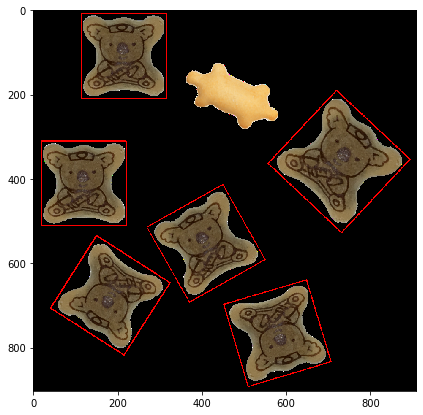

In [13]:

fig=plt.figure(figsize=(7,7))
plt.imshow(contour_modules.draw_contours(test_img.copy(),minrect_boxes_contours,0,0))
plt.show()



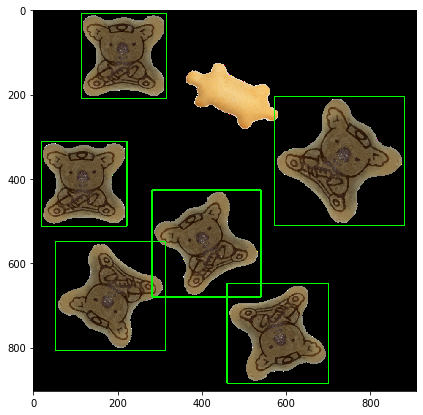

In [15]:

fig=plt.figure(figsize=(7,7))
plt.imshow(contour_modules.draw_boxes(test_img.copy(),box_locations))

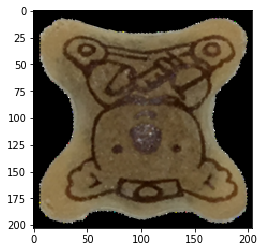

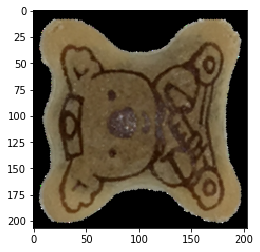

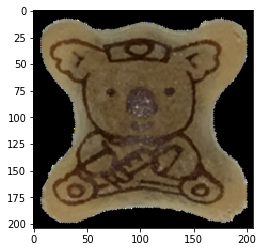

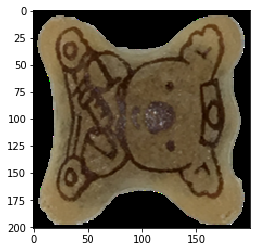

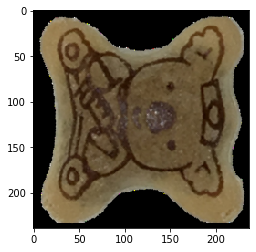

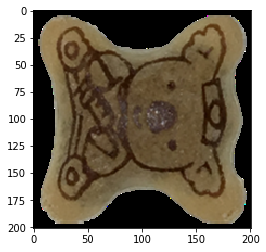

In [18]:
for cnt in minrect_boxes_contours:
    cut_img=image_processing_modules.min_rect_cut(test_img,cnt)
    plt.imshow(cut_img)
    plt.show()